# Aula 03 - Gráficos, Time Series e Análise Exploratória

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)

In [2]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [4]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados["Metragem"]
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [5]:
dados_vendas.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [6]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [7]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [8]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem                  231.24
Quartos                     3.39
Banheiros                   3.24
Vagas                       2.95
Valor_anuncio_float   1771159.76
Valor_m2                 7913.15
Name: Vila Mariana, dtype: float64

In [9]:
# dados_bairro["Valor_m2_bairro"]["Vila Mariana"]
dados_bairro.loc["Vila Mariana"]["Valor_m2_bairro"]

7659.510222881855

In [10]:
top_bairro = dados_vendas["Bairro"].value_counts()[:10].index

In [11]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [12]:
dados_bairro.query("Bairro in @top_bairro")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


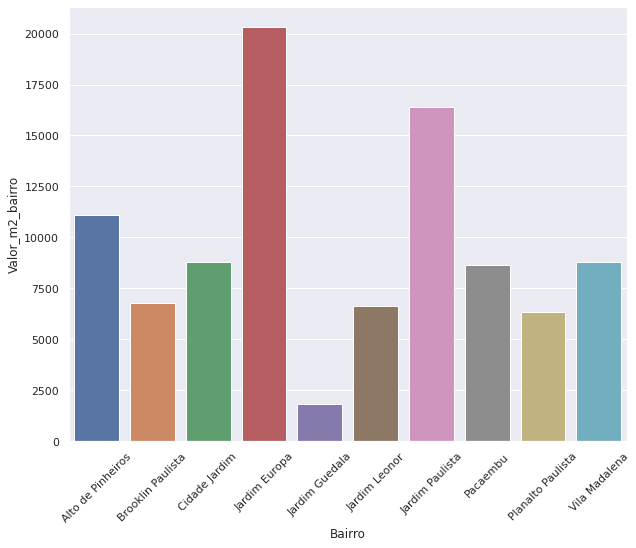

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data = dados_bairro.query("Bairro in @top_bairro"))
ax.tick_params(axis="x", rotation=45)

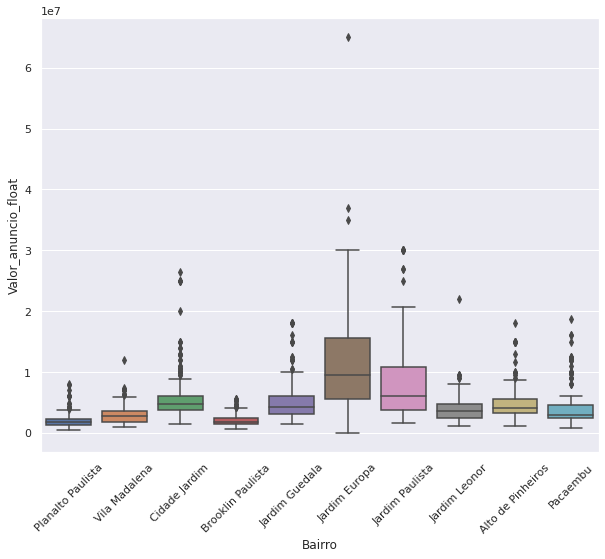

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairro"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis="x", rotation=45)
plt.show()

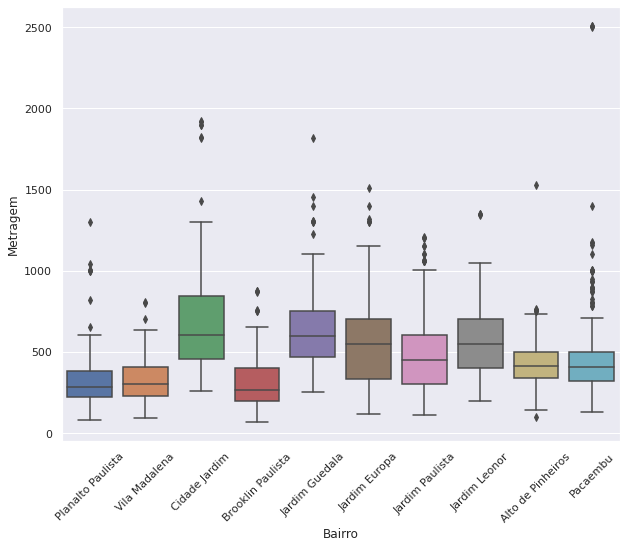

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairro & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis="x", rotation=45)
plt.show()

In [16]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


In [17]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.00
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.00
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.00
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


# Desafios

### 1 - Tentar vincular dados do IBGE com os dados de imóveis.

In [18]:
# Tratando a base de dados
dados_ibge = pd.read_csv(ibge_url, sep=';', encoding='ISO-8859-1')
# dados_ibge["Nome_Grande_Regiao"].unique()
dados_ibge.drop(columns=['Cod_setor', 'Cod_Grandes Regiï¿½es', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 
                         'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM', 'Situacao_setor', 'Tipo_setor'], inplace=True)
dados_ibge.head()

,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,V001,V002,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),266.00,800.00,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),306.00,913.00,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),189.00,625.00,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),181.00,572.00,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),240.00,754.00,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


### 2 - Tratar os outliers e comparar com os resultados.

In [19]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,5291.32
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,168.00,3.00,2.00,2.00,890000.00,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,80000.00


In [20]:
# Outliers em Metragem
dados_vendas[dados_vendas['Metragem'] > 3000]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2.900.000,None,2900000.00,78.38
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000,R$,2.550.000,None,2550000.00,71.47
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,9.33


In [21]:
# Outliers em Banheiros
dados_vendas[dados_vendas['Banheiros'] > 5]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000,R$,2.700.000,None,2700000.00,3497.41
27,"Rua Andrade Neves, 37",Bela Aliança,São Paulo,502,4,6,4,R$ 2.985.000,R$,2.985.000,None,2985000.00,5946.22
28,Rua Japeacaba,Vila Albertina,São Paulo,268,3,6,4,R$ 1.700.000,R$,1.700.000,None,1700000.00,6343.28
29,Rua Senador Vergueiro,Santo Amaro,São Paulo,355,4,7,4,R$ 3.100.000,R$,3.100.000,None,3100000.00,8732.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000,R$,9.500.000,None,9500000.00,7037.04
9997,Rua Tapes,Jardim Aeroporto,São Paulo,157,5,7,4,R$ 840.000,R$,840.000,None,840000.00,5350.32
9999,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000,R$,2.800.000,None,2800000.00,6619.39
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98


In [22]:
# Outliers em Quartos
dados_vendas[dados_vendas['Quartos'] > 5]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000,R$,2.700.000,None,2700000.00,3497.41
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,R$ 430.000,R$,430.000,None,430000.00,1433.33
166,Rua Doutor Antônio Gontijo de Carvalho,Jardim Cordeiro,São Paulo,1200,6,7,8,R$ 6.360.000,R$,6.360.000,None,6360000.00,5300.00
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,R$ 500.000,R$,500.000,None,500000.00,2155.17
196,Rua Constantino de Sousa,Campo Belo,São Paulo,266,6,6,6,R$ 1.750.000,R$,1.750.000,None,1750000.00,6578.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,Rua Guararema,Bosque da Saúde,São Paulo,600,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3833.33
9962,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000,R$,951.000,None,951000.00,7608.00
9968,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
9998,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000,R$,951.000,None,951000.00,7608.00


In [23]:
# Tratando Outliers
metragem = dados_vendas['Metragem'] < 3000
banheiro = dados_vendas['Banheiros'] < 5
quartos = dados_vendas['Quartos'] < 5

dados_vendas[metragem & banheiro & quartos].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.00,4500.00


### 3 - Agrupar por mais de uma categoria e realizar as análises.

In [24]:
dados_morumbi = dados_vendas[dados_vendas['Bairro'] == 'Morumbi']
dados_morumbi

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
171,Rua Luís Dib Zogaib,Morumbi,São Paulo,443,4,6,8,R$ 1.800.000,R$,1.800.000,None,1800000.00,4063.21
213,Rua Emílio Pedutti,Morumbi,São Paulo,546,4,7,6,R$ 3.290.000,R$,3.290.000,None,3290000.00,6025.64
343,"Avenida Comendador Adibo Ares, 1230",Morumbi,São Paulo,686,5,6,5,R$ 3.350.000,R$,3.350.000,None,3350000.00,4883.38
377,NaN,Morumbi,São Paulo,566,4,7,8,R$ 3.500.000,R$,3.500.000,None,3500000.00,6183.75
455,NaN,Morumbi,São Paulo,764,4,4,6,R$ 3.500.000,R$,3.500.000,None,3500000.00,4581.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9486,Rua Almirante Soares Dutra,Morumbi,São Paulo,499,4,8,5,R$ 3.800.000,R$,3.800.000,None,3800000.00,7615.23
9527,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1000,5,8,6,R$ 3.350.000,R$,3.350.000,None,3350000.00,3350.00
9555,Rua Almirante Soares Dutra,Morumbi,São Paulo,558,4,7,8,R$ 4.800.000,R$,4.800.000,None,4800000.00,8602.15
9628,Rua Almirante Soares Dutra,Morumbi,São Paulo,504,4,8,5,R$ 3.800.000,R$,3.800.000,None,3800000.00,7539.68


In [25]:
dados_morumbi.groupby(['Quartos', 'Banheiros'])['Valor_m2'].describe()

count     mean     std      min      25%      50%      75%  \
Quartos Banheiros                                                               
1       1           2.00  4439.08   84.15  4379.57  4409.32  4439.08  4468.83   
3       3          10.00  5723.97  733.52  3965.52  5413.54  6053.73  6099.24   
        4          13.00  7144.75 2697.11  3865.98  4945.05  6603.77  8395.06   
        5           7.00  6771.36 2417.03  3676.47  5280.22  5937.50  8282.89   
        6           5.00  6748.60 1653.25  4211.66  6153.85  7393.36  7428.57   
4       1           4.00  5777.72 2290.06  3950.62  3987.65  5205.13  6995.19   
        2           2.00  5928.58 2727.41  4000.01  4964.29  5928.58  6892.86   
        3          10.00  7857.13 3484.14  3599.03  4436.78  8433.29 11052.63   
        4          11.00  5342.25  797.47  4581.15  4770.37  4987.53  5780.54   
        5          34.00  5616.85 1782.97  3434.78  4166.67  5138.46  6500.99   
        6          13.00  5767.60 1097.53  4063.21  5192.88  6016.26  6470.59   
        7          12.00  7854.34 4048.07  2985.07  4658.94  6297.00  9486.02   
        8           5.00  5309.81 2082.52  3602.48  3625.00  4166.67  7539.68   
5       2           1.00 11194.03     NaN 11194.03 11194.03 11194.03 11194.03   
        4           3.00  7759.18  629.57  7358.87  7396.34  7433.81  7959.33   
        5           4.00  4718.56 1862.58  3333.33  3345.83  4128.58  5501.31   
        6           3.00  4339.92 2343.21  1772.73  3328.05  4883.38  5623.51   
        7           2.00  5193.94  588.54  4777.78  4985.86  5193.94  5402.02   
        8           1.00  3350.00     NaN  3350.00  3350.00  3350.00  3350.00   
        9           3.00  9172.16   50.76  9142.86  9142.86  9142.86  9186.81   
6       6           4.00  5740.91 1475.56  3536.90  5662.62  6380.04  6458.33   
        8           1.00  7083.33     NaN  7083.33  7083.33  7083.33  7083.33   
        11          2.00  7900.24   23.23  7883.82  7892.03  7900.24  7908.45   
7       7           1.00  4375.00     NaN  4375.00  4375.00  4375.00  4375.00   

                       max  
Quartos Banheiros           
1       1          4498.58  
3       3          6500.00  
        4         12288.14  
        5         10659.34  
        6          8555.56  
4       1          8750.00  
        2          7857.14  
        3         11250.00  
        4          6912.44  
        5         10909.09  
        6          7432.43  
        7         15000.00  
        8          7615.23  
5       2         11194.03  
        4          8484.85  
        5          7283.76  
        6          6363.64  
        7          5610.10  
        8          3350.00  
        9          9230.77  
6       6          6666.67  
        8          7083.33  
        11         7916.67  
7       7          4375.00

In [26]:
dados_morumbi.groupby(['Quartos', 'Vagas'])['Valor_m2'].describe()

count     mean     std      min      25%      50%      75%  \
Quartos Vagas                                                               
1       1       2.00  4439.08   84.15  4379.57  4409.32  4439.08  4468.83   
3       3       4.00  9758.68 3869.78  4054.05  9008.02 11346.27 12096.93   
        4      14.00  6209.44 1505.62  4211.66  5013.14  5891.83  7799.33   
        5       6.00  6047.01  112.73  5830.00  6042.13  6088.08  6099.24   
        6       3.00  3835.99  146.84  3676.47  3771.22  3865.98  3915.75   
        8       4.00  7349.67 1303.50  6194.69  6236.17  7324.22  8437.72   
        9       2.00  7410.97   24.89  7393.36  7402.17  7410.97  7419.77   
        26      2.00  6643.18   55.72  6603.77  6623.47  6643.18  6662.88   
4       2       1.00  8750.00     NaN  8750.00  8750.00  8750.00  8750.00   
        3      12.00  8419.99 2403.98  5747.13  6582.12  7142.86 11052.63   
        4      21.00  4746.02  968.27  3599.03  3960.40  4422.60  5192.88   
        5      11.00  5993.87 1113.70  4166.67  5358.02  6125.00  6405.13   
        6      28.00  5702.12 1914.24  3434.78  4645.29  5109.08  6545.45   
        7       1.00 11600.00     NaN 11600.00 11600.00 11600.00 11600.00   
        8       7.00  5447.47 1855.44  2985.07  4258.88  5310.88  6358.20   
        9       1.00  6912.44     NaN  6912.44  6912.44  6912.44  6912.44   
        10      3.00  4545.91 1614.61  3602.48  3613.74  3625.00  5017.63   
        11      2.00  5019.02   44.53  4987.53  5003.27  5019.02  5034.76   
        12      1.00  5000.00     NaN  5000.00  5000.00  5000.00  5000.00   
        14      3.00 12896.06 3563.74  8781.36 11844.10 14906.83 14953.42   
5       4       4.00  5663.79 3748.48  3333.33  3345.83  4063.89  6381.84   
        5       1.00  4883.38     NaN  4883.38  4883.38  4883.38  4883.38   
        6       7.00  7363.18 2353.17  3350.00  6095.46  8484.85  9142.86   
        8       4.00  5543.88 2651.54  1772.73  4650.76  6484.48  7377.61   
        16      1.00  6363.64     NaN  6363.64  6363.64  6363.64  6363.64   
6       4       1.00  3536.90     NaN  3536.90  3536.90  3536.90  3536.90   
        6       4.00  7387.62  616.03  6666.67  6979.17  7483.58  7892.03   
        10      2.00  6380.04   12.51  6371.19  6375.62  6380.04  6384.46   
7       4       1.00  4375.00     NaN  4375.00  4375.00  4375.00  4375.00   

                   max  
Quartos Vagas           
1       1      4498.58  
3       3     12288.14  
        4      8395.06  
        5      6146.15  
        6      3965.52  
        8      8555.56  
        9      7428.57  
        26     6682.58  
4       2      8750.00  
        3     11250.00  
        4      6470.59  
        5      7615.23  
        6     10909.09  
        7     11600.00  
        8      8602.15  
        9      6912.44  
        10     6410.26  
        11     5050.51  
        12     5000.00  
        14    15000.00  
5       4     11194.03  
        5      4883.38  
        6      9230.77  
        8      7433.81  
        16     6363.64  
6       4      3536.90  
        6      7916.67  
        10     6388.89  
7       4      4375.00

### 4 - Organize o colab para deixar com cara de projeto.